In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
import shap
import joblib
from statannot.statannot import add_stat_annotation
from lib.data_load_utils import load_CULPRIT_data, get_data_from_features
from lib.experiment_definitions import get_features
from sklearn.calibration import calibration_curve


SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Models train test performance

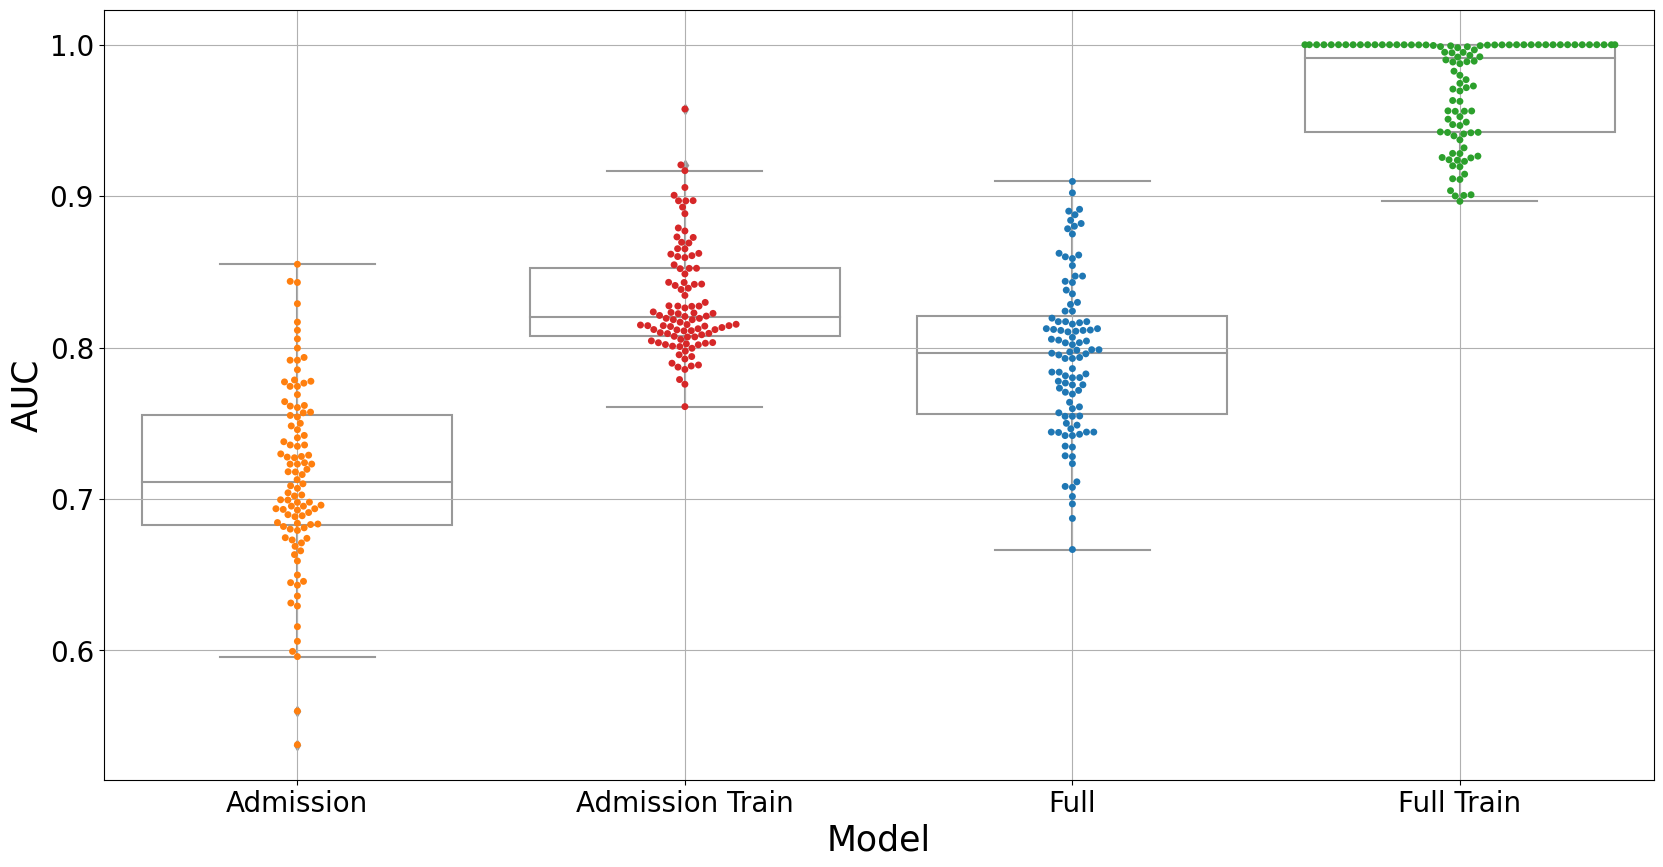

In [4]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False

results_admission_train = pd.read_csv(results_dir + "Admission_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False


results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"
results_full = pd.read_csv(results_dir + "Full_direct_remove.csv", index_col=0)
results_full = results_full[results_full["Thresholds"] == 0.5]
results_full = results_full[results_full["Number of Removed Features"] == 0]
results_full["Random State"] =  False


results_full_train = pd.read_csv(results_dir + "Full_training.csv", index_col=0)
results_full_train = results_full_train[results_full_train["Thresholds"] == 0.5]
results_full_train = results_full_train[results_full_train["Number of Removed Features"] == 0]
results_full_train["Random State"] =  False


results = pd.concat([results_full, results_admission, results_full_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

metric_to_plot = "AUC"

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Full",
                "Full Train", 
                ]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])


sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    order=models_to_plot, 
    dodge=False, hue="Model", ax=ax,
    # palette=[[1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           [1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           ]
)

sns.boxplot(
    data=results_true_label, color="w", zorder=1,
    x="Model", y=metric_to_plot,
    order=models_to_plot,
    dodge=True, ax=ax
)
plt.legend([], framealpha = 0)
plt.grid()

# Admission model on 24hs expired patients

Percentages or correctly critical patients classified
73.44%


(-0.5, 9.5)

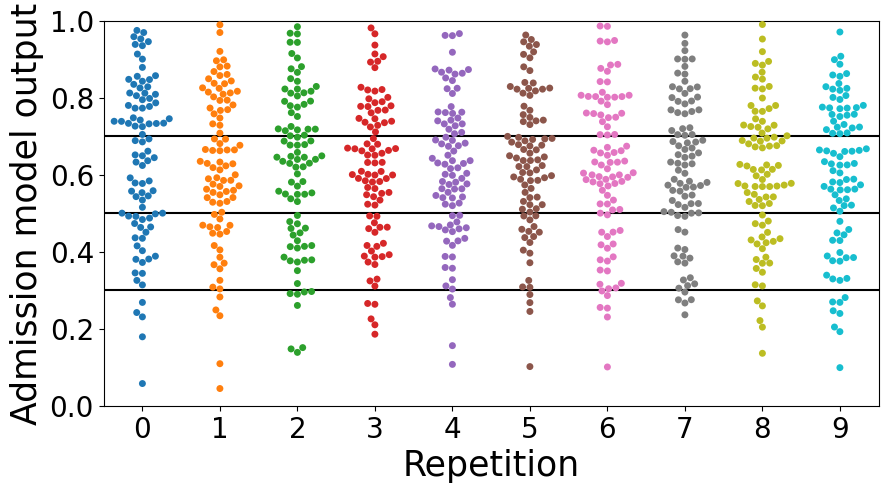

In [52]:

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

y_true = pd.read_csv(data_dir +"y_true_Admission.csv", index_col=0)

y_pred = pd.read_csv(data_dir +"Admission_predictions.csv", index_col=0)

y_severity = pd.read_csv(data_dir +"severity_Admission.csv", index_col=0)

y_severity = y_severity.astype(bool)

y_true = y_true[y_severity]
y_pred = y_pred[y_severity]

y_true = y_true.T
y_pred = y_pred.T

# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

# percentages or correctly critical patients classified
reshape_pred_round = round(reshape_pred)
print("Percentages or correctly critical patients classified")
print(str(round((reshape_pred_round.sum()*100/90).mean(),2))+"%")

all_predictions = []
repetition = []
reshape_pred.iloc[:,0].dropna()
df_pred = pd.DataFrame()
for c, col in enumerate(reshape_pred.columns):
    all_predictions.append(reshape_pred.iloc[:,c].dropna())
    repetition.append(c)
    df_pred[c] = reshape_pred.iloc[:,c].dropna().values
    # if c == 0:
    #     df_pred = columna
    # else:
    #     df_pred = pd.concat([df_pred, columna], axis=1)
plt.figure(figsize=[10,5])
sns.swarmplot(data=df_pred)
plt.plot([-.5,9.5],[0.5,0.5], c="black")
plt.plot([-.5,9.5],[0.3,0.3], c="black")
plt.plot([-.5,9.5],[0.7,0.7], c="black")

plt.xlabel("Repetition")
plt.ylabel("Admission model output")
plt.ylim([0,1])
plt.xlim([-.5,9.5])

# Threshold

The label '_none' of <matplotlib.collections.PolyCollection object at 0x7f7b100319a0> starts with '_'. It is thus excluded from the legend.
The label '_none' of <matplotlib.collections.PolyCollection object at 0x7f7b0b7d2820> starts with '_'. It is thus excluded from the legend.


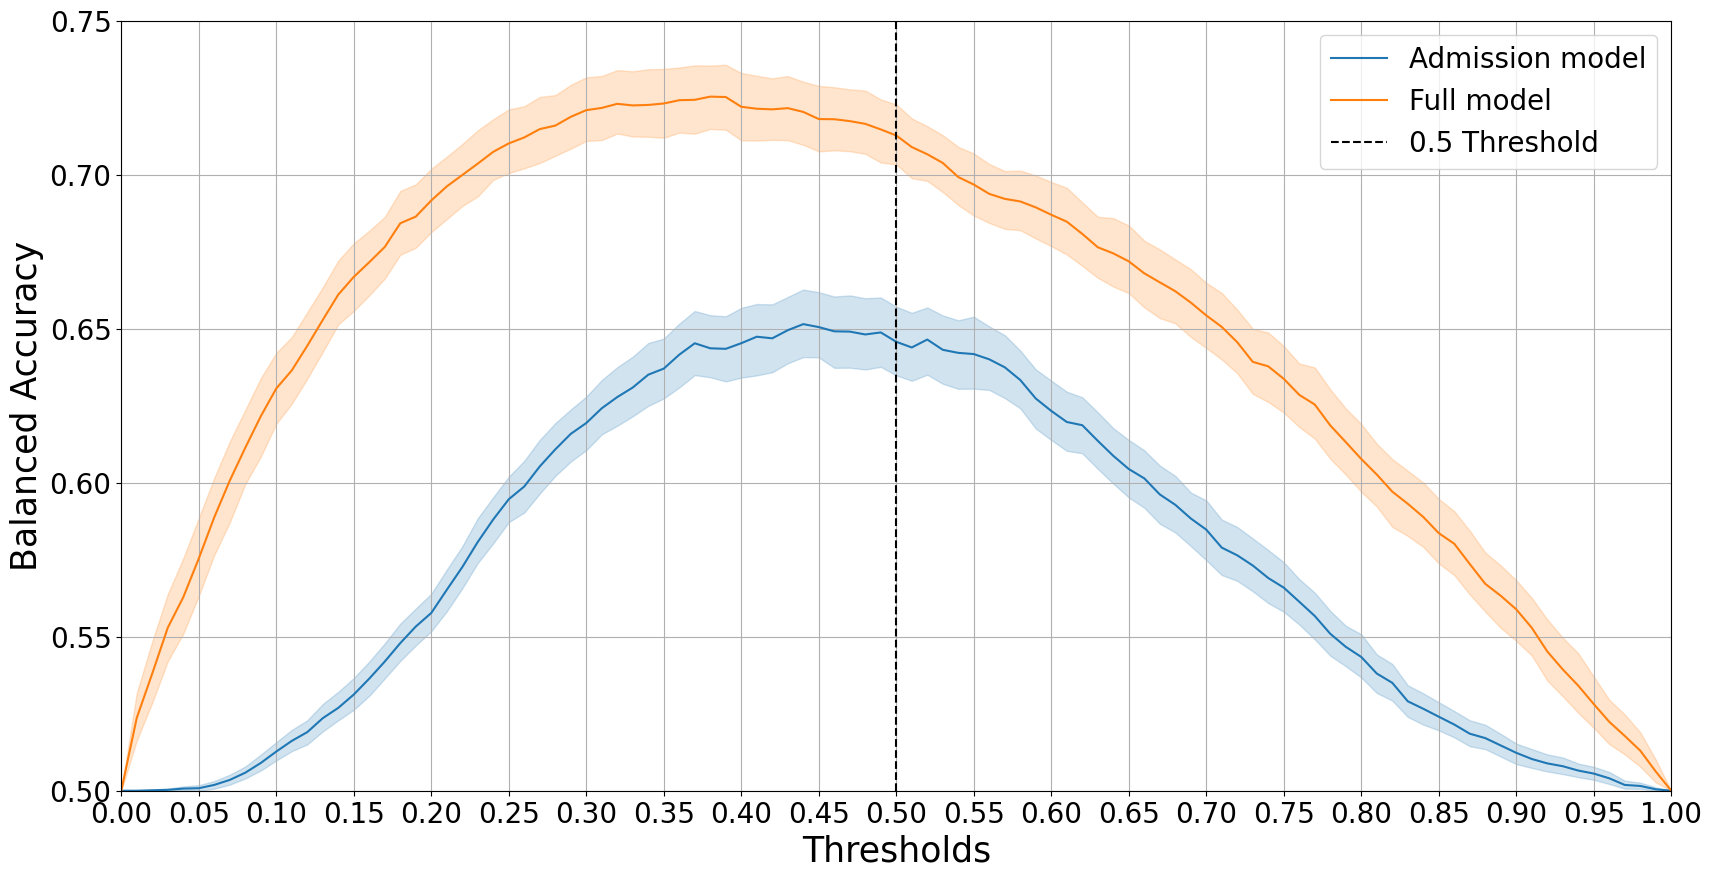

In [6]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False


results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"
results_full = pd.read_csv(results_dir + "Full_direct_remove.csv", index_col=0)
results_full = results_full[results_full["Number of Removed Features"] == 0]
results_full["Random State"] =  False

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
metric_to_plot = "Balanced ACC"

model_to_plot = "Admission"
results_ths_df_to_plot = results_admission[results_admission["Model"] == model_to_plot]   # noqa
sns.lineplot(data=results_ths_df_to_plot, y=metric_to_plot, x="Thresholds")
plt.ylabel("Performance")

model_to_plot = "Full"
results_ths_df_to_plot = results_full[results_full["Model"] == model_to_plot]   # noqa
sns.lineplot(data=results_ths_df_to_plot, y=metric_to_plot, x="Thresholds")
ths = 0.5

sns.lineplot(x=[ths-.00000001, ths+.00000001], y=[0.50, .8], ax=ax, color="black", linestyle="--", legend=True)
plt.ylim([0.5,0.75])
plt.xlim([0,1])
plt.ylabel("Balanced Accuracy")
plt.title("")
plt.grid()


plt.legend(["Admission model", "_none", "Full model", "_none", "0.5 Threshold"])
custom_ticks = np.arange(0, 1.01, 0.05)  # Range from 0 to 1 with step of 0.1
plt.xticks(custom_ticks)
plt.show()

# Table comparing LG and Admission

In [31]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/LG_compare/"

results_admission = pd.read_csv(results_dir + "Admission_complete.csv", index_col=0)
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

LG_resutls = pd.read_csv(results_dir + "LG_Admission_complete.csv", index_col=0)

LG_resutls.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

LG_test = LG_resutls[LG_resutls["Model"]== "LG_complete_admission_test"]

results_df = pd.concat([results_admission,LG_test])

results_true_label = results_df


models_to_plot = [
                  "Admission complete",
                #   "24hs",
                  "LG_complete_admission_test",
                #   "CLIP_SCORE", 
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")


Admission complete
Balanced ACC: 0.636 [0.511/0.761]
AUC: 0.695 [0.562/0.828]
F1: 0.582 [0.427/0.737]
Specificity: 0.715 [0.554/0.876]
Sensitivity: 0.557 [0.361/0.753]
LG_complete_admission_test
Balanced ACC: 0.672 [0.565/0.779]
AUC: 0.735 [0.616/0.854]
F1: 0.628 [0.497/0.759]
Specificity: 0.734 [0.567/0.901]
Sensitivity: 0.609 [0.426/0.792]


# Compare Admission with admission imputed data 

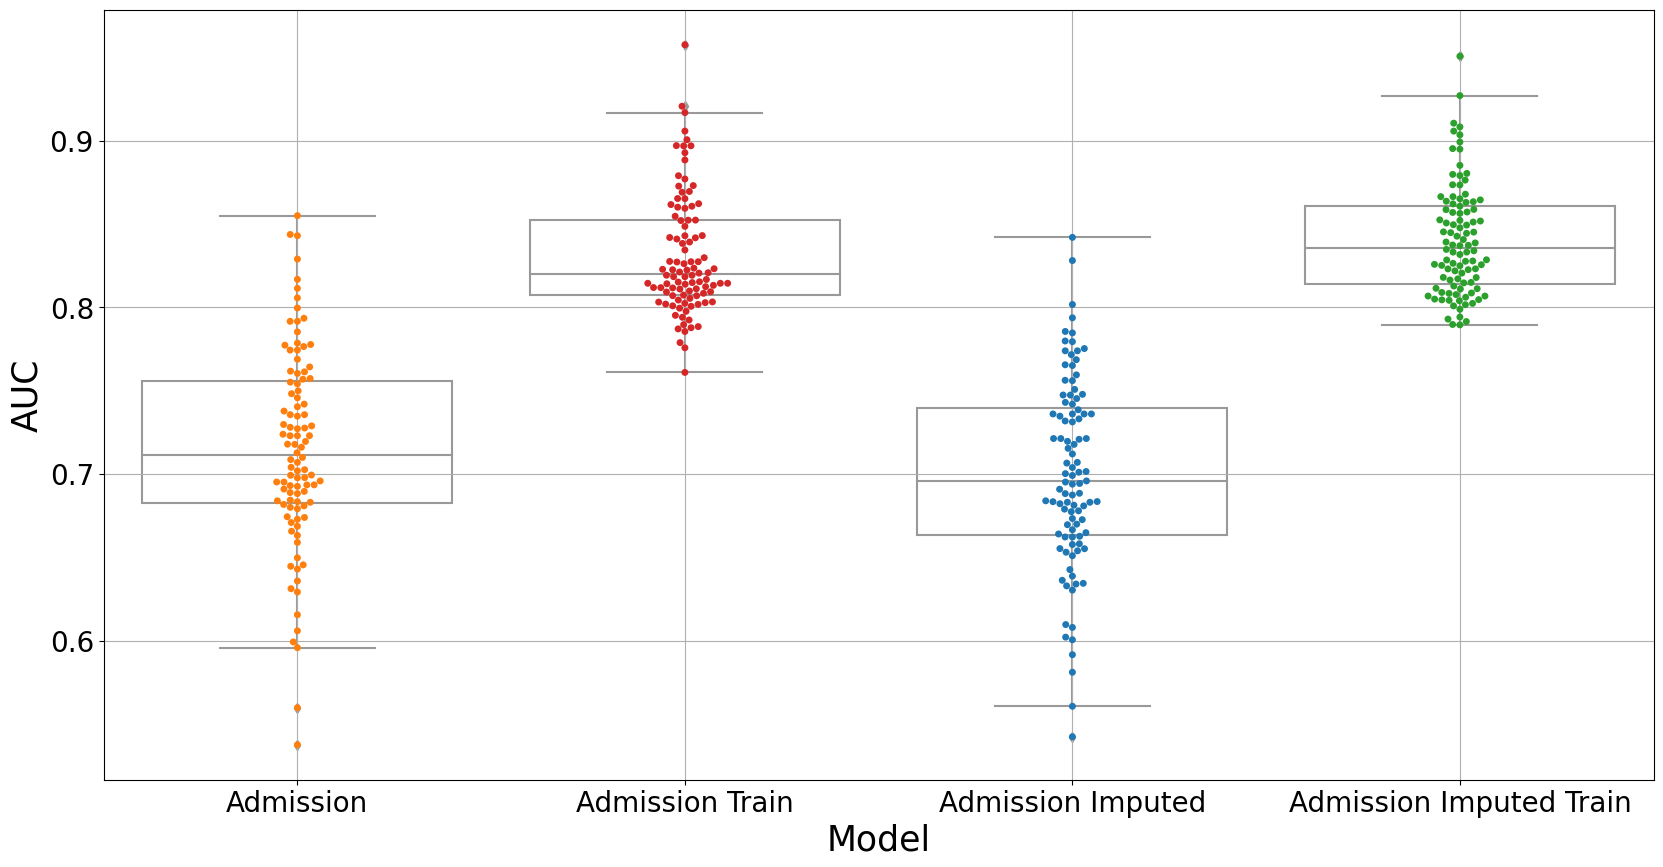

In [3]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False

results_admission_train = pd.read_csv(results_dir + "Admission_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/imputed_data/"
results_admission_imp = pd.read_csv(results_dir + "Admission_imp_big_experiment_direct_remove2.csv", index_col=0)
results_admission_imp = results_admission_imp[results_admission_imp["Thresholds"] == 0.5]
results_admission_imp = results_admission_imp[results_admission_imp["Number of Removed Features"] == 0]
results_admission_imp["Random State"] =  False
results_admission_imp["Model"] = "Admission Imputed"

results_admission_imp_train = pd.read_csv(results_dir + "Admission_imp_big_experiment_training2.csv", index_col=0)
results_admission_imp_train = results_admission_imp_train[results_admission_imp_train["Thresholds"] == 0.5]
results_admission_imp_train = results_admission_imp_train[results_admission_imp_train["Number of Removed Features"] == 0]
results_admission_imp_train["Random State"] =  False
results_admission_imp_train["Model"] = "Admission Imputed Train"


results = pd.concat([results_admission_imp, results_admission, results_admission_imp_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

metric_to_plot = "AUC"

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Admission Imputed",
                "Admission Imputed Train", 
                ]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])


sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    order=models_to_plot, 
    dodge=False, hue="Model", ax=ax,
    # palette=[[1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           [1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           ]
)

sns.boxplot(
    data=results_true_label, color="w", zorder=1,
    x="Model", y=metric_to_plot,
    order=models_to_plot,
    dodge=True, ax=ax
)
plt.legend([], framealpha = 0)
plt.grid()

In [10]:
from lib.data_processing import remove_low_variance_features
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/CULPRIT_data/202302_Jung/" # noqa
# endpoint to use
endpoint_to_use = "fu_ce_death_le30d_yn"    # or "fu_ce_death_le365d_yn"

# Get different features depending on the model
# Get all data
patient_info = load_CULPRIT_data(data_dir)

# Set target
y = patient_info.loc[:, ["patient_ID", endpoint_to_use]]

# Extract all the 24hs available features
exp_name = "24hs"
patient_features = get_features(exp_name)

data = get_data_from_features(patient_info, patient_features)
# Remove low variance features
data = remove_low_variance_features(data, 0.1)

alive_patients = data[y["fu_ce_death_le30d_yn"] == 0]

alive_patients.shape

10 Features deleted


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `

(361, 35)

In [17]:
alive_patients = data[y["fu_ce_death_le30d_yn"] == 1]

alive_patients.mean()


had_dem_age_yr                     71.938462
had_dem_male_yn                     0.734568
had_pex_weight_kg                  81.727564
had_pex_height_cm                 171.817590
previous_heart_complications        0.233846
p_mh_pad_yn                         0.123028
p_rf_smoker_yn                      0.165563
p_rf_aht_yn                         0.597444
p_rf_dyslip_yn                      0.261290
p_rf_dm_yn                          0.365385
hpr_ecg_sinrhy_y                    0.658462
hpr_ecg_afib_y                      0.160000
hpr_ecg_stemi_yn                    0.592949
hpr_hmdyn_hr_bpm                   91.644654
hpr_hmdyn_sbp_mmhg                 95.148734
hpr_hmdyn_dbp_mmhg                 56.031646
had_sy_ams_yn                       0.739130
had_sy_extremity_yn                 0.727273
had_base_mechvent_yn                0.629283
had_base_cpr24h_yn                  0.540373
admission_lactate                  49.357506
icu_lab_lact8hpci_x                70.116579
icu_lab_la

In [16]:
alive_patients["hpe_proc_mechs_yn"].sum()

118

In [18]:
alive_patients.isnull().sum()


had_dem_age_yr                    0
had_dem_male_yn                   1
had_pex_weight_kg                13
had_pex_height_cm                18
previous_heart_complications      0
p_mh_pad_yn                       8
p_rf_smoker_yn                   23
p_rf_aht_yn                      12
p_rf_dyslip_yn                   15
p_rf_dm_yn                       13
hpr_ecg_sinrhy_y                  0
hpr_ecg_afib_y                    0
hpr_ecg_stemi_yn                 13
hpr_hmdyn_hr_bpm                  7
hpr_hmdyn_sbp_mmhg                9
hpr_hmdyn_dbp_mmhg                9
had_sy_ams_yn                     3
had_sy_extremity_yn               6
had_base_mechvent_yn              4
had_base_cpr24h_yn                3
admission_lactate                52
icu_lab_lact8hpci_x             114
icu_lab_lact16hpci_x            143
icu_lab_lact24hpci_x            161
pbnp                            130
icu_lab_ck_x                     58
tnt                             130
creatine                    

In [9]:
eicu_root = "/home/nnieto/Nico/MODS_project/data/eicu-collaborative-research-database-2.0/preprocessed_MACRO/"          # noqa
X_eicu = pd.read_csv(eicu_root + "X_Full_CICU.csv", index_col=0)

Y_test_eicu = pd.read_csv(eicu_root + "y_CICU.csv", index_col=0)

In [10]:
alive_patients = X_eicu[Y_test_eicu["hospitaldischargestatus"] == 0]

alive_patients.mean()


had_dem_age_yr                    61.838926
had_dem_male_yn                    0.637584
had_pex_weight_kg                 85.797415
had_pex_height_cm                171.162013
previous_heart_complications       0.268456
p_mh_pad_yn                        0.046980
p_rf_smoker_yn                          NaN
p_rf_aht_yn                        0.536913
p_rf_dyslip_yn                     0.087248
p_rf_dm_yn                         0.154362
hpr_ecg_sinrhy_y                   0.671141
hpr_ecg_afib_y                     0.167785
hpr_ecg_stemi_yn                   0.093960
hpr_hmdyn_hr_bpm                  90.668831
hpr_hmdyn_sbp_mmhg               116.450000
hpr_hmdyn_dbp_mmhg                62.650000
had_sy_ams_yn                      0.000000
had_sy_extremity_yn                0.013423
had_base_mechvent_yn               0.382550
had_base_cpr24h_yn                 0.000000
admission_lactate                  3.891364
icu_lab_lact8hpci_x                3.904907
icu_lab_lact16hpci_x            

In [5]:
Y_test_eicu

,hospitaldischargestatus
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
240,0.0
241,0.0
242,0.0
243,0.0
